# Generancion de Distrito de medicion de caudales en una red de agua potable
## Author: Roger, GUTIERREZ ESPINOZA
## Date: 23 de Junio del 2023

In [8]:
## importamos librerias
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [9]:
## lectura de datos
%run -i read_data.py
from read_data import read_inp_file
junctions, pipes, cordinates, patterns  = read_inp_file("L-TOWN.inp")
dt=pd.merge(cordinates, junctions, left_on=';Node', right_on=';ID')
df=dt[['X-Coord','Y-Coord','Elev','Demand','Pattern']]
df

,X-Coord,Y-Coord,Elev,Demand,Pattern
0,138.22,1549.64,73.2105,0.000000,P-Residential
1,274.23,1504.56,73.8737,0.169920,P-Residential
2,271.28,1480.96,73.1782,0.190800,P-Residential
3,186.62,1326.65,68.2608,0.000000,P-Residential
4,158.93,1233.34,65.5695,0.232200,P-Residential
...,...,...,...,...,...
777,1487.17,801.53,27.9200,0.000000,P-Residential
778,1452.46,826.63,27.6400,0.143530,P-Residential
779,1487.84,761.07,26.4000,0.100840,P-Residential
780,1440.88,763.00,24.6000,0.034200,P-Residential


In [11]:
## Remove Column
df.drop(columns=['Pattern'], inplace=True)
df.head()

<ipython-input-11-a00af0a802ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Pattern'], inplace=True)


,X-Coord,Y-Coord,Elev,Demand
0,138.22,1549.64,73.2105,0.000000
1,274.23,1504.56,73.8737,0.169920
2,271.28,1480.96,73.1782,0.190800
3,186.62,1326.65,68.2608,0.000000
4,158.93,1233.34,65.5695,0.232200


In [12]:
## Escalado de datos
scaler = MinMaxScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)
## verificamos la estandarizacion
print(df_std.describe())
df_std

          X-Coord     Y-Coord        Elev      Demand
count  782.000000  782.000000  782.000000  782.000000
mean     0.416739    0.431894    0.378722    0.136305
std      0.301242    0.204814    0.210748    0.127369
min      0.000000    0.000000    0.000000    0.000000
25%      0.153318    0.276285    0.256447    0.039799
50%      0.331450    0.407661    0.320062    0.115713
75%      0.670741    0.566192    0.415025    0.189744
max      1.000000    1.000000    1.000000    1.000000


,X-Coord,Y-Coord,Elev,Demand
0,0.001185,0.955849,0.960849,0.000000
1,0.051551,0.926588,0.969782,0.170729
2,0.050459,0.911270,0.960414,0.191709
3,0.019108,0.811110,0.894183,0.000000
4,0.008854,0.750544,0.857935,0.233306
...,...,...,...,...
777,0.500720,0.470262,0.350844,0.000000
778,0.487867,0.486554,0.347073,0.144214
779,0.500968,0.444000,0.330372,0.101320
780,0.483578,0.445253,0.306128,0.034363


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca.fit(df_std)
df_pca = pca.transform(df_std)
print(f"Original data: {df_std.shape}")
print(f"data Transformadas: {df_pca.shape}")

Original data: (782, 4)
data Transformadas: (782, 3)



La original data (df_std) tiene 782 filas y 4 columnas, mientas la data transformada (df_pca) tiene 618 filas y 3 columnas. Esto significa que realizar la reducción de funciones de PCA redujo la cantidad de funciones de 4 a 3, al mismo tiempo que se conservó el 90 % de la varianza explicada en los datos..

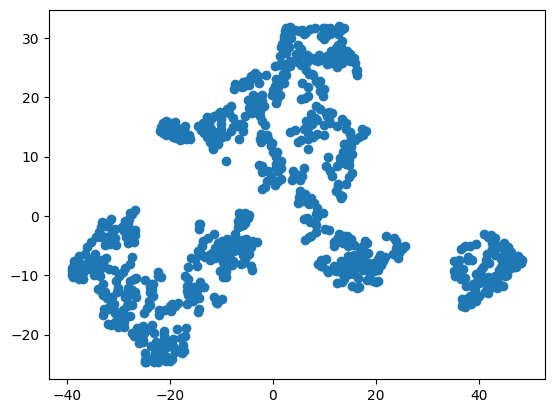

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Instantiate t-SNE model
tsne = TSNE(learning_rate=35)

# Fit the model to the PCA-transformed data
tsne.fit_transform(df_pca)

# Visualize the results
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
plt.show()

### NUMERO DE CLUSTER?
Visualmente aparece 4 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

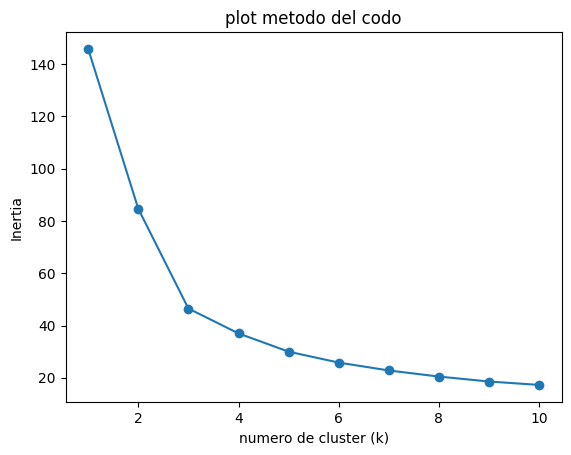

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Instantiate KMeans model for k values 1-10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('numero de cluster (k)')
plt.ylabel('Inertia')
plt.title('plot metodo del codo')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


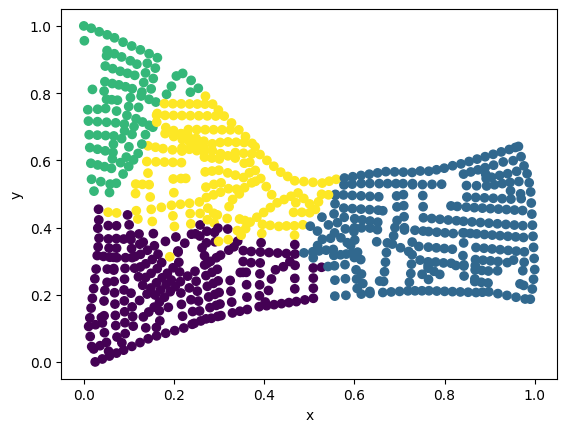

In [16]:
km = KMeans(n_clusters=4)
km.fit(df_pca)
label=km.labels_
label
plt.scatter(df_std['X-Coord'], df_std['Y-Coord'], c=label)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
df

,X-Coord,Y-Coord,Elev,Demand
0,138.22,1549.64,73.2105,0.000000
1,274.23,1504.56,73.8737,0.169920
2,271.28,1480.96,73.1782,0.190800
3,186.62,1326.65,68.2608,0.000000
4,158.93,1233.34,65.5695,0.232200
...,...,...,...,...
777,1487.17,801.53,27.9200,0.000000
778,1452.46,826.63,27.6400,0.143530
779,1487.84,761.07,26.4000,0.100840
780,1440.88,763.00,24.6000,0.034200


### Where the elbow of the plot is, and at which value of k it appears?

The elbow point appears to be around 3 or 4 clusters. Therefore, we might choose 3 or 4 as the optimal number of clusters for this dataset.

### Recommendations

Based on the findings of the unsupervised learning analysis, I would recommend using K-means clustering with 3 clusters to group the patients based on their myopia risk factors. This approach could potentially lead to better predictions of myopia by identifying distinct subgroups of patients with similar risk factors. Additionally, clustering the patients separately may be more effective than training on the whole dataset, as our team previously attempted and failed to do.